# US Accidents Exploratory Data Analysis

About the Dataset:
1. The dataset is downloaded from Kaggle
2. It contains information about accidents in the US
3. This data can be used for preventing accidents

In [1]:
import numpy as np
import pandas as pd

# Data Preparation and Cleaning

Steps:
1. Load the Dataset using Pandas
2. Understand the Data
3. Fixing missing and incorret values

In [2]:
df = pd.read_csv("US_Accidents_Dec20_updated.csv")

In [3]:
r,c = df.shape #Finding out the number of rows and columns
print("Number of rows:",r)
print("Number of columns:",c)

Number of rows: 1516064
Number of columns: 47


In [4]:
df.info() #Understanding details about every column in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.describe().T #Understanding statistics of the Data

,count,mean,std,min,25%,50%,75%,max
Severity,1516064.0,2.238630,0.608148,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,1516064.0,36.900558,5.165653,24.570222,33.854225,37.351130,40.725927,4.900058e+01
Start_Lng,1516064.0,-98.599194,18.496022,-124.497567,-118.207575,-94.381003,-80.874690,-6.711317e+01
End_Lat,1516064.0,36.900606,5.165629,24.570110,33.854204,37.351342,40.725930,4.907500e+01
End_Lng,1516064.0,-98.599010,18.495903,-124.497829,-118.207746,-94.379875,-80.874490,-6.710924e+01
Distance(mi),1516064.0,0.587262,1.632659,0.000000,0.000000,0.178000,0.594000,1.551860e+02
Number,469969.0,8907.533114,22421.896710,0.000000,1212.000000,4000.000000,10100.000000,9.999997e+06
Temperature(F),1473031.0,59.584597,18.273164,-89.000000,47.000000,61.000000,73.000000,1.706000e+02
Wind_Chill(F),1066748.0,55.109760,21.127345,-89.000000,40.800000,57.000000,71.000000,1.130000e+02
Humidity(%),1470555.0,64.659601,23.259865,1.000000,48.000000,68.000000,84.000000,1.000000e+02


In [6]:
print("Number of Numerical Columns:", len(df.count(numeric_only=True)))

Number of Numerical Columns: 27


In [7]:
No_of_missing_vals = df.isna().sum().sort_values(ascending=False) #in descending order
missing_val_percentages = No_of_missing_vals/len(df)*100
print("Percentage of Missing values:\n\n",missing_val_percentages)

Percentage of Missing values:

 Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                   

In [8]:
missing_val_percentages = missing_val_percentages[missing_val_percentages !=0 ]
#removing the columns with zero percent missing values
missing_val_percentages

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
dtype: float64

<AxesSubplot:>

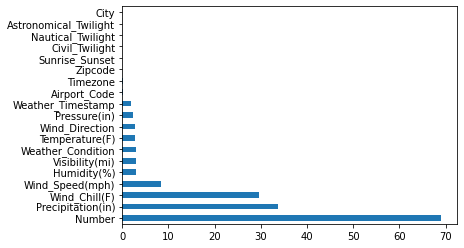

In [9]:
missing_val_percentages.plot(kind="barh")

Dropping first 3 columns because of high percentage of missing data

In [10]:
df = df.drop(columns=["Number", "Precipitation(in)", "Wind_Chill(F)"], axis=0)

In [11]:
No_of_missing_vals = df.isna().sum().sort_values(ascending=False) #in descending order
missing_val_percentages = No_of_missing_vals/len(df)*100
missing_val_percentages = missing_val_percentages[missing_val_percentages !=0 ]
print("Available Data to analyze with Missing Data percentage:\n\n",missing_val_percentages)

Available Data to analyze with Missing Data percentage:

 Wind_Speed(mph)          8.499773
Humidity(%)              3.001786
Visibility(mi)           2.916170
Weather_Condition        2.902714
Temperature(F)           2.838469
Wind_Direction           2.760965
Pressure(in)             2.392643
Weather_Timestamp        1.996222
Airport_Code             0.280199
Timezone                 0.151841
Zipcode                  0.061673
Nautical_Twilight        0.005475
Civil_Twilight           0.005475
Sunrise_Sunset           0.005475
Astronomical_Twilight    0.005475
City                     0.005475
dtype: float64


# Exploratory Analysis and Visualisation

# City

In [12]:
cities = df.City.unique()
print("Total number of cities:",len(cities))

Total number of cities: 10658


In [13]:
cities_by_accidents = df.City.value_counts() #get number of occurences of cities in each row
print("Top 20 cities with highest accidents:")
cities_by_accidents[:20]

Top 20 cities with highest accidents:


Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

New york being one of the highly populated cities is not in the list. Need to study more.

Highest Accidents respective to Cities:


<AxesSubplot:>

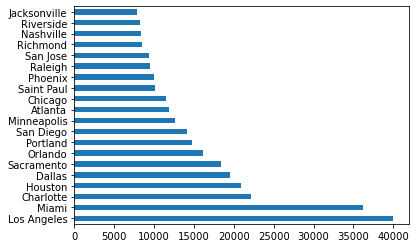

In [14]:
print("Highest Accidents respective to Cities:")
cities_by_accidents[:20].plot(kind="barh")

In [15]:
import seaborn as sns
sns.set_style("darkgrid")

In [16]:
total_accidents = r
total_cities = len(cities)
mean_value_accidents = total_accidents/total_cities
print("The mean accident value is:",mean_value_accidents)

The mean accident value is: 142.24657534246575


In [17]:
higher_accident_cities = cities_by_accidents[cities_by_accidents>142]
lower_accident_cities = cities_by_accidents[cities_by_accidents<=142]

In [18]:
p = (len(higher_accident_cities)/len(cities))*100
print("Percentage of cities with accidents higher than mean accident value 142: ",p)
p = (len(lower_accident_cities)/len(cities))*100
print("Percentage of cities with accidents lower than mean accident value 142: ",p)

Percentage of cities with accidents higher than mean accident value 142:  14.608744604991555
Percentage of cities with accidents lower than mean accident value 142:  85.38187277162694


Less than 15 % of cities have more than mean accident value. As we do not have any data about population we cannot compute the accident rate per city, but can still include this in further study.

Graph representing number of accidents per city


<AxesSubplot:xlabel='City', ylabel='Count'>

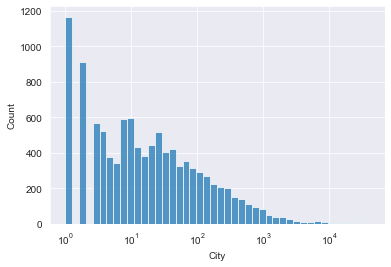

In [19]:
print("Graph representing number of accidents per city")
sns.histplot(cities_by_accidents,log_scale=True)

Observation: Most of the accidents occur in a fixed small group of cities which is very high and make the data skewed in one direction.

In [20]:
one_acc_cities = cities_by_accidents[cities_by_accidents == 1]
print("Count of cities with just 1 accident: ",len(one_acc_cities))
print("Percentage of cities with just 1 accident: ",(len(one_acc_cities)/len(cities))*100)

Count of cities with just 1 accident:  1167
Percentage of cities with just 1 accident:  10.949521486207543


# Start Time

In [21]:
df.Start_Time = pd.to_datetime(df.Start_Time) # converting strings to timestamp object
acc_time_hour = df.Start_Time.dt.hour # get the hour

Graph showing Hourly accidents:


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

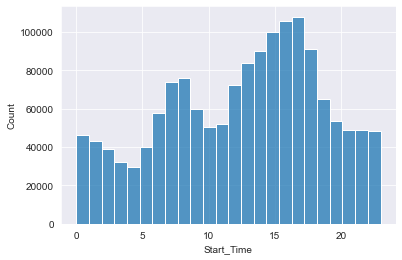

In [22]:
print("Graph showing Hourly accidents:")
sns.histplot(acc_time_hour, bins=24) # plot hourly accidents

Observation:
The number of accidents peak from 4 to 6 pm in the evening. Next highest percentage is observed from morning 7 to 9 am.

Graphy showing weekly accidents:


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

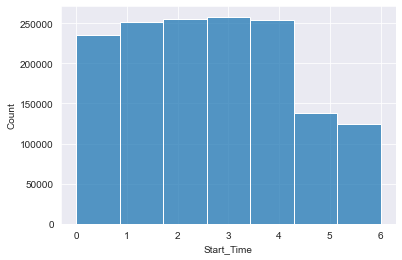

In [23]:
acc_week_occured = df.Start_Time.dt.dayofweek # get the week
print("Graphy showing weekly accidents:")
sns.histplot(acc_week_occured, bins=7) # plot hourly accidents

Observation:
As we can see major accidents occur in the weekdays.

# Observing the trends in accident timings on week days and weekends

Hourly Accidents on Weekends:


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

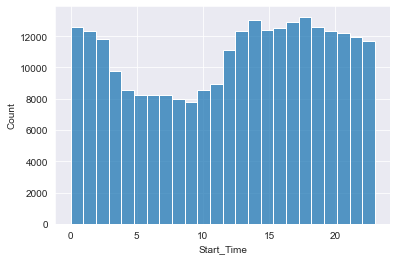

In [24]:
sat_acc_times = df.Start_Time[df.Start_Time.dt.dayofweek==5]
sun_acc_times = df.Start_Time[df.Start_Time.dt.dayofweek==6]
weekends_acc_times = pd.concat([sat_acc_times, sun_acc_times], axis=0)
print("Hourly Accidents on Weekends:")
sns.histplot(weekends_acc_times.dt.hour, bins=24) # plot hourly accidents

Hourly Accidents on Mondays:


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

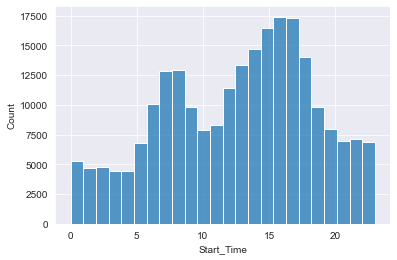

In [25]:
mon_acc_times = df.Start_Time[df.Start_Time.dt.dayofweek==0]
print("Hourly Accidents on Mondays:")
sns.histplot(mon_acc_times.dt.hour, bins=24) # plot hourly accidents

Hourly Accidents on Thursdays:


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

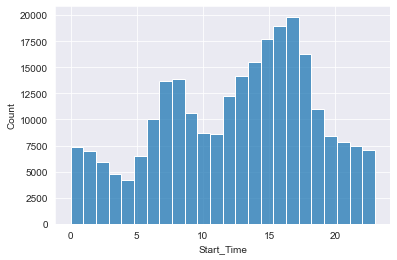

In [26]:
thurs_acc_times = df.Start_Time[df.Start_Time.dt.dayofweek==3]
print("Hourly Accidents on Thursdays:")
sns.histplot(thurs_acc_times.dt.hour, bins=24) # plot hourly accidents

# Monthly Analysis

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

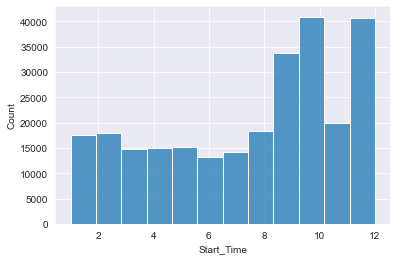

In [27]:
acc_monthly_occured_2019 = df[df.Start_Time.dt.year == 2019] # get the year 2019
sns.histplot(acc_monthly_occured_2019.Start_Time.dt.month, bins=12) # plot monthly accidents

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

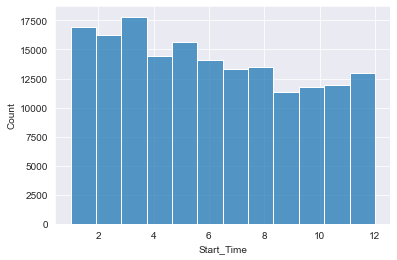

In [28]:
acc_monthly_occured_2017 = df[df.Start_Time.dt.year == 2017] # get the year 2017
sns.histplot(acc_monthly_occured_2017.Start_Time.dt.month, bins=12) # plot monthly accidents

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

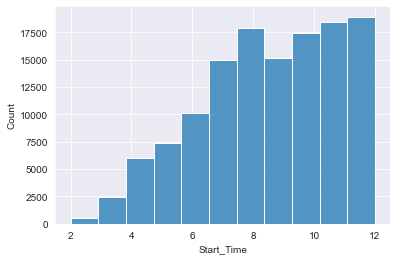

In [29]:
acc_monthly_occured_2016 = df[df.Start_Time.dt.year == 2016] # get the year 201
sns.histplot(acc_monthly_occured_2016.Start_Time.dt.month, bins=11) # plot monthly accidents, bins=11 as January Data missing

There is missing data from January 2016 and due to newly start of recording accidents the calculations might not be accurate at the beginning. Still need more research.

# Yearly Accidents

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

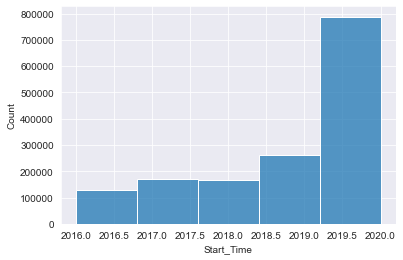

In [30]:
sns.histplot(df.Start_Time.dt.year, bins=5) # plot yearly accidents

There is missing data about January 2016 as mentioned in the dataset, so let use not consider 2016 for our analysis

Yearly Accidents after dropping 2016:



<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

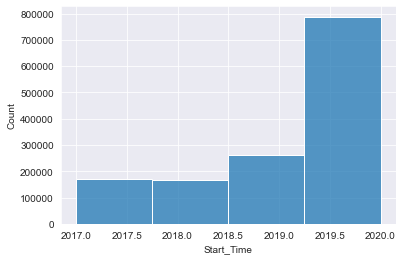

In [31]:
years_after_2016 = df[df.Start_Time.dt.year != 2016]
print("Yearly Accidents after dropping 2016:\n")
sns.histplot(years_after_2016.Start_Time.dt.year, bins=4) #not considering 2016

Observation: The number of accidents increased drastically in the year 2020. So let us analyze the year 2020 monthly to understand the reasons for this significant rise in the accidents.

# Analysis on Year 2020 / COVID 19 Pandemic

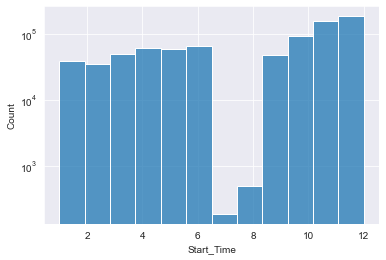

In [32]:
acc_monthly_occured_2020 = df[df.Start_Time.dt.year == 2020] # get the year 2020
o = sns.histplot(acc_monthly_occured_2020.Start_Time.dt.month, bins=12) # plot monthly accidents
o.set_yscale("log")

Observations: 
1. The number of accidents at the beginning of the year show a stable increasing trend.
2. In the month of July and August 2020 because of lockdown and restrictions of COVID 19 pandemic the accidents dropped significantly around 1000.
3. There is a sudden spike in the number of accidents for which the reason might be the removal of lockdown restrictions tempting people to get out of their house.

# Start Latitude and Start Longitude

In [33]:
df.Start_Lat.head() #moves up and down

0    40.10891
1    39.86542
2    39.10266
3    39.10148
4    41.06213
Name: Start_Lat, dtype: float64

In [34]:
df.Start_Lng.head() #moves #left and right

0   -83.09286
1   -84.06280
2   -84.52468
3   -84.52341
4   -81.53784
Name: Start_Lng, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

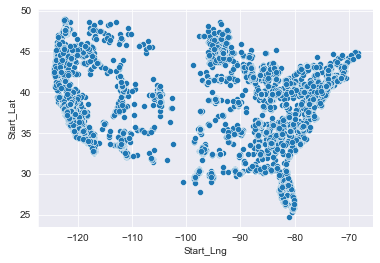

In [35]:
test_sample = df.sample(int(0.01*len(df))) # 1 percent sample
sns.scatterplot(x=test_sample.Start_Lng,y=test_sample.Start_Lat)

Observations:
    Major Accidents occur around the coastal regions because major cities like Los Angelas, Miami, Houston and others lie in coastal regions.

# Insights / Findings from the Data

1. This dataset does not contain any data about New York being one of the highly populated cities.
2. Only 15 % of cities have more than mean accident value which is 142 and less than 2.5% of the cities have reported more than 1000 accidents.
3. 11 % of the cities have just 1 accident over 5 years.
4. The number of accidents per city decreases exponentially.
6. Most accidents occur from 4 to 6 pm, probably people going home after work causing heavy traffics.
7. The next highest percentage of accidents is observed from 7 to 9 am, which might be because of people leaving for work early mornings.
8. Major accidents occur in weekdays as there are fewer people travelling on weekends.
9. If we observe the hourly accidents on week days and weekends they follow different trends. On weekdays it is observed that all the peak hours of accident are either between 7 to 9 am or 4 to 6 pm. While the pattern changes on weekends.
10. In the weekends, it is observed that number of accidents is very high right from morning 10 am to next day 3 am. The reason behind this may be people go out more on weekends to relax and celebrate which is why it is evenly distributed till next day morning.
11. It is observed that the data from year 2016  behaves differently as compared to others, therefore it needs more detailed investigation.
12. The major accidents occur near the coastal areas where all the highly populated cities are located.

# Conclusion

Major accidents occured in highly populated cities where there is high traffic in rush hours. A good traffic management system will significantly reduce the number of accidents.

# Future Work

1. We can find the relation between the weather and the accidents.
2. We can compare the number of accidents with Visibility factor.
3. We can find city population dataset and then find the accident rate of each city.
4. We can work on the sudden change in pattern after 2020 in more detail and find the reasons for it.